In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/colab/trademill.csv')

In [6]:
import numpy as np
import seaborn as sns

In [7]:
#View the data
df.head()

,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
0,TM1,18,Male,14.0,Single,3,4,29562,NaN
1,TM1,19,Male,15.0,Single,2,3,31836,75.0
2,TM1,19,Female,14.0,Partnered,4,3,30699,66.0
3,TM1,19,Male,12.0,Single,3,3,32973,85.0
4,TM1,20,Male,13.0,Partnered,4,2,35247,47.0


In [8]:
#Basic information

df.info()

#Describe the data

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          180 non-null    object 
 1   Age              180 non-null    int64  
 2   Gender           169 non-null    object 
 3   Education        176 non-null    float64
 4   Marital Status   180 non-null    object 
 5   Treadmill Usage  180 non-null    int64  
 6   Fitness Level    180 non-null    int64  
 7   Salary           180 non-null    int64  
 8   Miles            175 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.8+ KB


,Age,Education,Treadmill Usage,Fitness Level,Salary,Miles
count,180.000000,176.000000,180.000000,180.000000,180.000000,175.000000
mean,28.788889,15.585227,3.455556,3.311111,53719.577778,103.577143
std,6.943498,1.626076,1.084797,0.958869,16506.684226,52.477620
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,120.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
#Find the duplicates

df.duplicated().sum()


0

In [10]:
#unique values

df['Product'].unique()

df['Age'].unique()

df['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [11]:
#Find null values

df.isnull().sum()
df.dtypes


Product             object
Age                  int64
Gender              object
Education          float64
Marital Status      object
Treadmill Usage      int64
Fitness Level        int64
Salary               int64
Miles              float64
dtype: object

In [12]:
#Replace null values

column_means = df.mean()
df = df.fillna(column_means)

#Check the changes now
df.isnull().sum()
df = df.astype({"Miles": int})
df = df.astype({"Education": int})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df['Gender'].fillna(df['Gender'].mode())
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode())
df['Miles'].fillna(df['Miles'].mode())
df['Miles']=df['Miles'].replace(0,df['Miles'].mean())
df['Education']=df['Education'].replace(0,df['Education'].mean())
df.loc[15]

Product                  TM1
Age                       23
Gender                  Male
Education                 16
Marital Status     Partnered
Treadmill Usage            3
Fitness Level              3
Salary                 40932
Miles                     75
Name: 15, dtype: object

In [14]:
df.loc[13]

Product               TM1
Age                    22
Gender             Female
Education              15
Marital Status     Single
Treadmill Usage         3
Fitness Level           3
Salary              35247
Miles                  75
Name: 13, dtype: object

In [15]:
#Datatypes

df.dtypes

Product            object
Age                 int64
Gender             object
Education           int64
Marital Status     object
Treadmill Usage     int64
Fitness Level       int64
Salary              int64
Miles               int64
dtype: object

In [16]:
#Filter data

df[df['Miles']==75].head()


,Product,Age,Gender,Education,Marital Status,Treadmill Usage,Fitness Level,Salary,Miles
1,TM1,19,Male,15,Single,2,3,31836,75
6,TM1,21,Female,14,Partnered,3,3,35247,75
12,TM1,22,Female,16,Single,4,3,36384,75
13,TM1,22,Female,15,Single,3,3,35247,75
15,TM1,23,Male,16,Partnered,3,3,40932,75


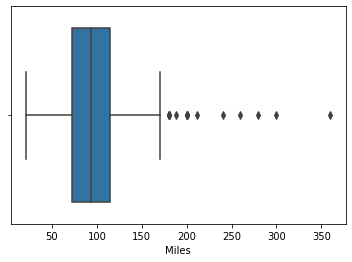

In [17]:
sns.boxplot(x=df["Miles"])

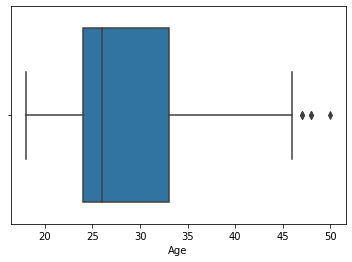

In [18]:
sns.boxplot(x=df["Age"])

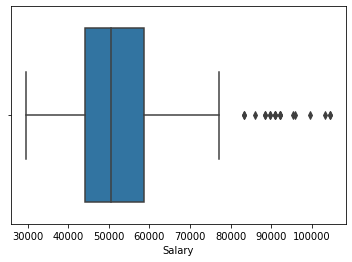

In [19]:
sns.boxplot(x=df["Salary"])

In [20]:
############## Outlier Treatment ###############
import seaborn as sns
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.1,0.80]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  Product
capping the  Age
capping the  Gender
capping the  Education
capping the  Marital Status
capping the  Treadmill Usage
capping the  Fitness Level
capping the  Salary
capping the  Miles


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyW

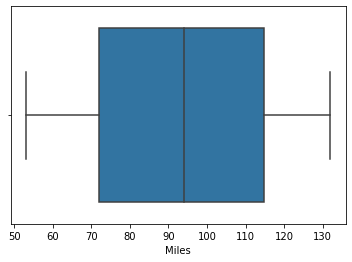

In [21]:
sns.boxplot(x=df["Miles"])


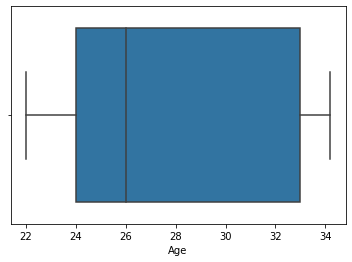

In [22]:
sns.boxplot(x=df["Age"])

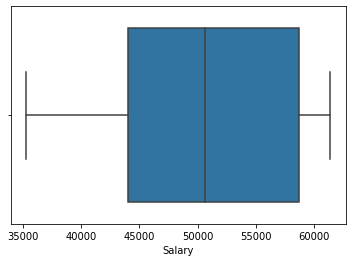

In [23]:
sns.boxplot(x=df["Salary"])

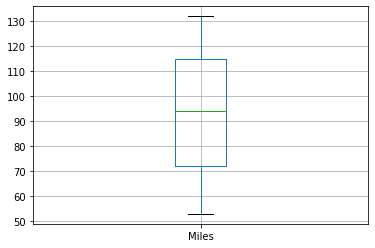

In [24]:
df[['Miles']].boxplot()

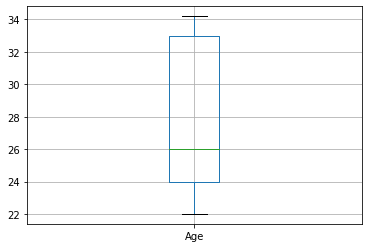

In [25]:
df[['Age']].boxplot()

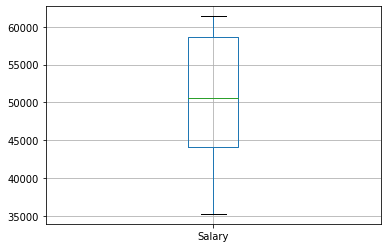

In [26]:
df[['Salary']].boxplot()

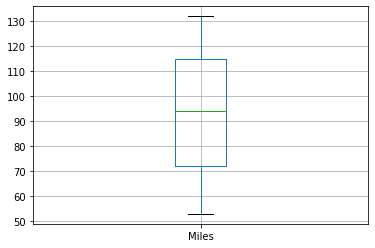

In [27]:
df[['Miles']].boxplot()

In [28]:
#Correlation 

df.corr()


,Age,Education,Treadmill Usage,Fitness Level,Salary,Miles
Age,1.000000,0.328659,-0.002787,0.038729,0.637021,0.004982
Education,0.328659,1.000000,0.277100,0.247832,0.510122,0.215544
Treadmill Usage,-0.002787,0.277100,1.000000,0.566244,0.295154,0.711971
Fitness Level,0.038729,0.247832,0.566244,1.000000,0.335567,0.806271
Salary,0.637021,0.510122,0.295154,0.335567,1.000000,0.335272
Miles,0.004982,0.215544,0.711971,0.806271,0.335272,1.000000


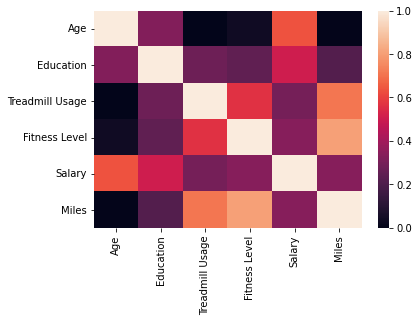

In [29]:
#Correlation plot

sns.heatmap(df.corr())


In [31]:
df.to_csv('/content/gdrive/MyDrive/colab/newtrademill.csv')